## Regresión

In [84]:
import pandas as pd

BDclase5 = pd.read_excel(r"C:\Users\DanielGP\OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA\Tendencias\Personal\Especialización\Materias\Estadística\Induccion - copia.xlsx")
BDclase5.head()

,VMATRI,PROM,HORAS,ESTRATO,TRAB,FAC,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,602089,3.2,23,4,SI,CIENCIAS,NaN,mu_VMATRI>600000,con sigma_VMATRI=
1,645860,3.3,32,4,SI,MINAS,NaN,NaN,NaN
2,230028,3.5,28,4,NO,AGRONOMIA,Ho:,mu_VMATRI<=600000,NaN
3,560515,4.2,24,3,NO,MINAS,Ha:,mu_VMATRI>600000,NaN
4,536309,3.2,28,3,SI,CIENCIAS,NaN,NaN,NaN


Regresión

                            OLS Regression Results                            
Dep. Variable:                   PROM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.939
Date:              sáb, 27 sept. 2025   Prob (F-statistic):              0.164
Time:                        08:30:05   Log-Likelihood:                -516.72
No. Observations:                1000   AIC:                             1037.
Df Residuals:                     998   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3291      0.056     59.668      0.0

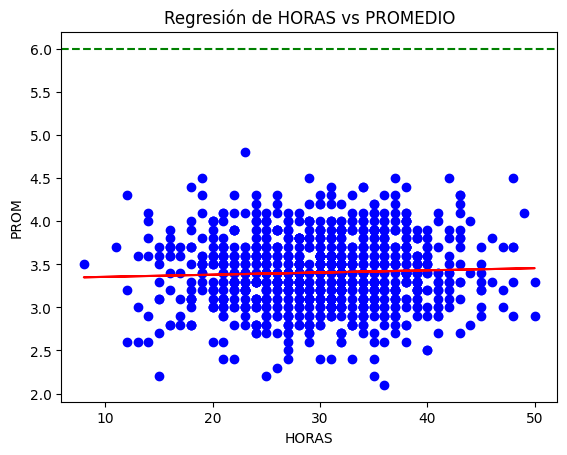

In [85]:
# Haciendo uso de la regresión, calcular si el promedio de horas es mayor a 20. Gráficar también.
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = BDclase5['HORAS']
y = BDclase5['PROM']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

plt.scatter(BDclase5['HORAS'], BDclase5['PROM'], color='blue')
plt.plot(BDclase5['HORAS'], predictions, color='red')
plt.axhline(y=6, color='green', linestyle='--')
plt.xlabel('HORAS')
plt.ylabel('PROM')
plt.title('Regresión de HORAS vs PROMEDIO')
plt.show()


Taller de clase

In [86]:
import pandas as pd
BDTallerClase = pd.read_csv(r"C:\Users\DanielGP\OneDrive - Caja de Compensacion Familiar de Antioquia COMFAMA\Tendencias\Personal\Especialización\Materias\Estadística\Base de datos.txt", sep=" ")
BDTallerClase.head()

,Y,X1,X2,X3,X4,X5
0,5.0,7.78,45.5,20.9,71.6,489
1,2.9,8.86,51.3,9.5,87.5,100
2,4.4,11.65,54.5,18.6,96.1,248
3,1.8,7.67,51.7,2.5,40.4,106
4,4.6,10.16,54.2,8.4,51.5,831


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     30.96
Date:              sáb, 27 sept. 2025   Prob (F-statistic):           4.98e-07
Time:                        08:30:06   Log-Likelihood:                -98.374
No. Observations:                  69   AIC:                             200.7
Df Residuals:                      67   BIC:                             205.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9919      0.646      1.535      0.1

C:\Users\DanielGP\AppData\Local\Temp\ipykernel_20452\460342153.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_value = anova_table['F'][0]
C:\Users\DanielGP\AppData\Local\Temp\ipykernel_20452\460342153.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


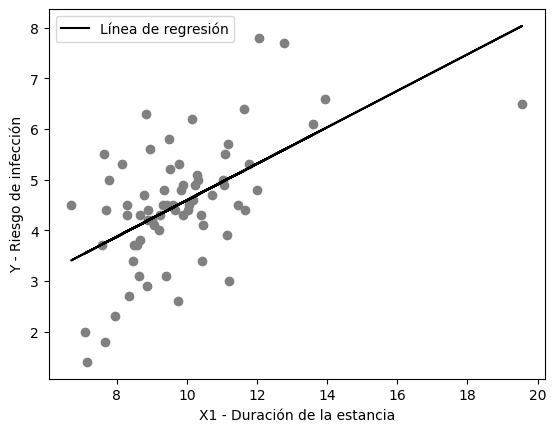

In [87]:
import numpy as np

# En un estudio a gran escala realizado en EE.UU sobre la eficacia en el control de infecciones hopistalarias se recogió información en 113 hospitales.
# A su equipo de trabajo le corresponde analizar una muestra aleatoria de n hospitales que están dentro de un archivo de un texto adjunto,d donde n es el número de registros en el archivo asignado y X es el número de equipo asignado.
#La base de datos contiene las siguientes columnas - variables: calcular los betas, uno da 0.36  , 31% # coeficiente de correlación, se mide para mirar si la regresión está buena. 

# Y = Riesgo de infección Probabilidad promedio estimada de adquirir una infección en el hospital (en porcentaje)
#X1 = Duración de la estancia. Duración promedio de la estancia hospitalaria (en días)
#X2 = Rutina de cultivos. Razón del nuúmero de cultivos realizados en pacientes sin sintomas de infección hospitalaria por cada 100.
#X3 = Número de camas. Promedio de camas en el hospital durante el periodo del estudio.
#X4 = Censo promedio diario. Número promedio de pacientes el hospital por día durante el periodo de estudio
#X5 = Número de enfermeras. Número promedio de enfermeras de tiempo completo en el hospital durante el periodo del estudio.

# 1) Emplee el análisis de regresión líneal multiple y explique el riesgo de infección en término de las variables restantes (actuando como predictoras Xi).

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Usar la API de fórmulas para evitar el error de design_info
model = smf.ols('Y ~ X1', data=BDTallerClase).fit()
predictions = model.predict(BDTallerClase)
print(model.summary())

#Calculamos las betas
betas = model.params
print(f'Betas: {betas}')

#Calculamos el coeficiente de correlación
correlation_matrix = np.corrcoef(BDTallerClase['X1'], BDTallerClase['Y'])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f'Coeficiente de correlación (R^2): {r_squared}')

#Hallamos la tabla anova 
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#prueba de significancia de la regresión
f_value = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
print(f'F-valor: {f_value}')
print(f'P-valor: {p_value}')

#Gráficamos la regresión lineal entre X1 y Y
plt.scatter(BDTallerClase['X1'], BDTallerClase['Y'], color='gray')
plt.xlabel('X1 - Duración de la estancia')
plt.ylabel('Y - Riesgo de infección')
plt.plot(BDTallerClase['X1'], predictions, color='black', label='Línea de regresión')
plt.legend()
plt.show() 

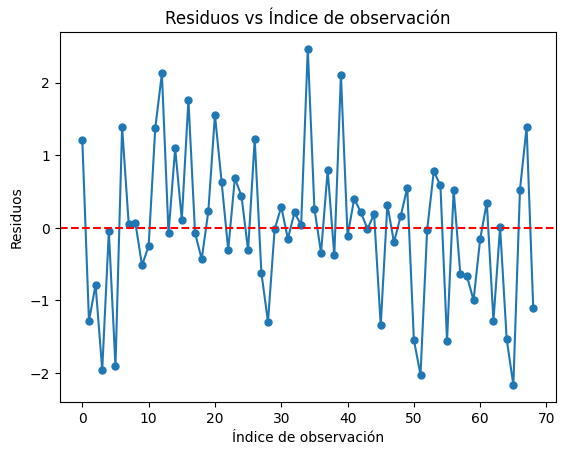

In [88]:
#Validación de supuestos de la regresión
residuals = model.resid
orden = np.arange(len(residuals))

#Graficamos solo los residuos en una gráfica con puntos únicos por líneas
plt.plot(orden, residuals, 'o-',markersize=5)
plt.axhline(0, color='red', linestyle='--') 
plt.xlabel('Índice de observación')
plt.ylabel('Residuos')
plt.title('Residuos vs Índice de observación')
plt.show()

Estadístico de Shapiro-Wilk: 0.9791403719222306, p-valor: 0.3023259078429156
Los residuos parecen seguir una distribución normal (no se rechaza H0)


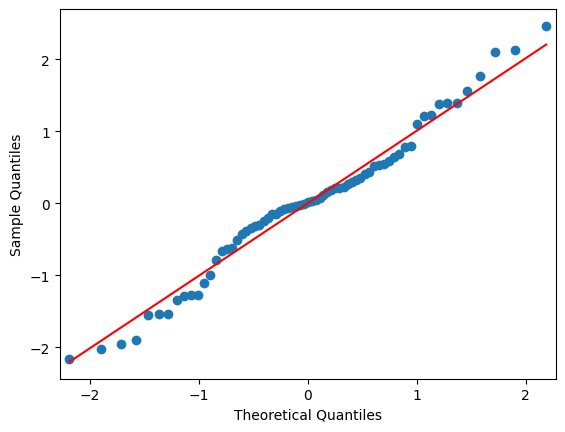

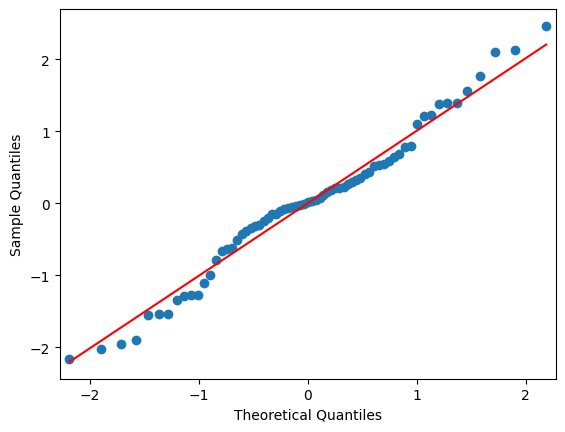

In [89]:
#Calculamos normalidad de los residuos con un QQ plot   #Nota: SE LE DEBEN QUITAR LOS DATOS ATIPICOS
from statsmodels.graphics.gofplots import qqplot    

from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f'Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los residuos parecen seguir una distribución normal (no se rechaza H0)")

qqplot(residuals, line='s')

{'Lagrange multiplier statistic': np.float64(0.02233245797158967), 'p-value': np.float64(0.8812060695123798), 'f-value': np.float64(0.021692161208332433), 'f p-value': np.float64(0.883351285503287)}


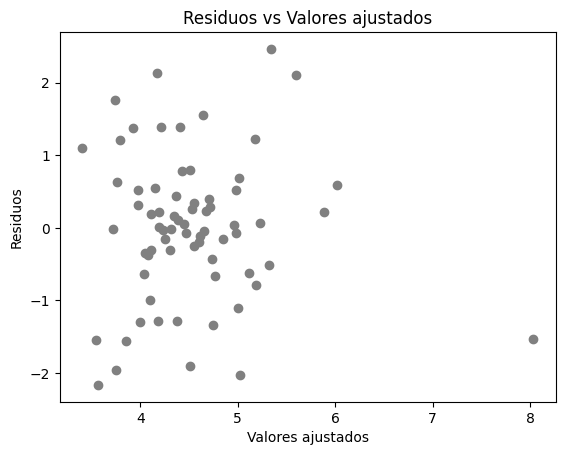

In [90]:
#Calculamos homocedasticidad con el test de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


#Calculamos la varianza constante de los residuos
fitted_vals = model.fittedvalues
plt.scatter(fitted_vals, residuals, color='gray')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados')
plt.show()

In [91]:
#Hallamos la linealidad del modelo con un gráfico de dispersión


In [92]:
#Hacemos el calculo de la formula Y = mX + b
#donde m es la pendiente, X es la variable independiente y b es la intersección con el eje Y
m = betas['X1']
b = betas['Intercept']
x = 10

Y = m * x + b
print(f'Para X1 = {x}, el valor predicho de Y es: {Y}')
print(m)
print(b)

Para X1 = 10, el valor predicho de Y es: 4.592006931876395
0.3600059362753005
0.9919475691233905


### CLASE 6



Taller de clase 2 - regresión multiple

In [119]:
#Aplicar la regresión múltiple con todas las variables predictoras usando la API de fórmulas
import statsmodels.formula.api as smf

model = smf.ols('Y ~ X1 + X2 + X3 + X4 + X5', data=BDTallerClase).fit()
predictions = model.predict(BDTallerClase)
print(model.summary())
print("\n" + "="*60 + "\n")
print("Tabla Anova:\n")

#Hallamos la tabla anova
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


#Calulamos la suma de cuadrado de la regresión (SCR)
SCR = model.ess
print("\n" + "="*60 + "\n")
print("SCR value:\n")
print(SCR)

#Calculamos la suma de cuadrados del error (SCE)
SCE = anova_table['sum_sq']['Residual']
print("\n" + "="*60 + "\n")
print("SCE value:\n")
print(SCE)

SCT = SCR + SCE

#Calculamos el MSE  - Cuadrado medio del error
MSE = SCE / anova_table['df']['Residual']
print("\n" + "="*60 + "\n")
print("MSE value:\n")
print(MSE)

#Calculamos el RMSE - Raíz del cuadrado medio del error
RMSE = np.sqrt(MSE)
print("\n" + "="*60 + "\n")
print("RMSE value:\n")
print(RMSE)

#Calculamos los valores atipicos aplicando la división de los residuales entre el RMSE
Atipicos = abs(residuals / RMSE)
print("\n" + "="*60 + "\n")
print("Valores atípicos:\n")
print(Atipicos)
Numero_Atipicos = len(Atipicos[Atipicos > 3])
print(f'Número de valores atípicos (|residual/RMSE| > 3): {Numero_Atipicos}')

#Ahora hallamos cual de estos es el valor atipico
Atipicos_Valores = Atipicos[Atipicos > 3]
print("\n" + "="*60 + "\n")
print("Valores atípicos:\n")
print(Atipicos_Valores)


#Calculamos los puntos de balanceo  / Espacio predictor que se aleja del resto de los datos
Puntos_Balanceo = model.get_influence().hat_matrix_diag
print("\n" + "="*60 + "\n")
print("Puntos de balanceo:\n")
print(Puntos_Balanceo)

#Se aplica la regla de 2*(k+1)/n para encontrar los puntos de balanceo
n = len(BDTallerClase)
k = model.df_model
Criterio = 2 * (k + 1) / n
Puntos_Balanceo_altos = Puntos_Balanceo[Puntos_Balanceo > Criterio]
Numero_Puntos_Balanceo = len(Puntos_Balanceo_altos)
print(f'Número de puntos de balanceo (hat > {Criterio}): {Numero_Puntos_Balanceo}')
print("\n" + "="*60 + "\n") 
print("Puntos de balanceo altos:\n")
print(Puntos_Balanceo_altos)

#Calculamos los datos studentizados de los residuos 
DatosStudentizados = model.get_influence().resid_studentized_external
print("\n" + "="*60 + "\n")
print("Datos studentizados de los residuos:\n")
print(abs(DatosStudentizados))

# Hallamos la influencia con la distancia de Cook
Distancia_Cook = model.get_influence().cooks_distance[0]
print("\n" + "="*60 + "\n")
print("Distancia de Cook:\n")
print(Distancia_Cook)

#Definimos los puntos influentes si Di > 1
Puntos_Influyentes = Distancia_Cook[Distancia_Cook > 1]
Numero_Puntos_Influyentes = len(Puntos_Influyentes)
print("\n" + "="*60 + "\n")
print(f'Número de puntos influyentes (D > 1): {Numero_Puntos_Influyentes}')
print("Puntos influyentes:\n")
print(Puntos_Influyentes)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     20.87
Date:              sáb, 27 sept. 2025   Prob (F-statistic):           3.09e-12
Time:                        09:35:42   Log-Likelihood:                -77.779
No. Observations:                  69   AIC:                             167.6
Df Residuals:                      63   BIC:                             181.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2449      1.231     -0.199      0.8